In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
file_path = '../data/raw/FD_SALAAN_2021_csv/FD_SALAAN_2021.csv'

# Create the DataFrame
df = pd.read_csv(file_path, sep=';', low_memory=False)

print(f"Dataset loaded with {df.shape[0]} observations.")

Dataset loaded with 2403775 observations.


In [9]:
# Check dimensions (Rows, Columns)
print(f"Shape: {df.shape}")

# List all column names 
print(f"Columns: {df.columns.values}")

# Summary of data types and non-null counts
# This is critical for seeing if 'S_NET_EUR' (Salary) is a float or an object
df.info()

Shape: (2403775, 31)
Columns: ['A6' 'A17' 'A38' 'CPFD' 'DATDEB' 'DATFIN' 'DEPR' 'DEPT' 'DOMEMPL'
 'DOMEMPL_EM' 'DUREE' 'FILT' 'REGR' 'REGT' 'SEXE' 'PCS' 'TYP_EMPLOI'
 'CONV_COLL' 'NBHEUR' 'NBHEUR_TOT' 'AGE' 'TRNNETO' 'TRALCHT' 'TREFF'
 'CONT_TRAV' 'CS' 'AGE_TR' 'DATDEB_TR' 'DATFIN_TR' 'DUREE_TR' 'POND']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403775 entries, 0 to 2403774
Data columns (total 31 columns):
 #   Column      Dtype  
---  ------      -----  
 0   A6          object 
 1   A17         object 
 2   A38         object 
 3   CPFD        object 
 4   DATDEB      float64
 5   DATFIN      float64
 6   DEPR        object 
 7   DEPT        object 
 8   DOMEMPL     float64
 9   DOMEMPL_EM  float64
 10  DUREE       float64
 11  FILT        int64  
 12  REGR        float64
 13  REGT        float64
 14  SEXE        int64  
 15  PCS         object 
 16  TYP_EMPLOI  object 
 17  CONV_COLL   float64
 18  NBHEUR      float64
 19  NBHEUR_TOT  int64  
 20  AGE         float64
 21  TR

In [10]:
# Check for standard NaN/null values first
null_counts = df.isnull().sum()
print("Standard null values per column:")
print(null_counts[null_counts > 0])

# Find columns with empty strings or whitespace
for col in df.select_dtypes(include=['object']).columns:
    empty_count = (df[col].astype(str).str.strip() == '').sum()
    if empty_count > 0:
        print(f"Column {col} has {empty_count} empty string entries.")

Standard null values per column:
A6             96234
A17            96234
A38             8377
CPFD           87887
DATDEB         87891
DATFIN         87887
DEPR             690
DEPT             223
DOMEMPL        87893
DOMEMPL_EM     87895
DUREE          87887
REGR             690
REGT             223
PCS                5
CONV_COLL     580663
NBHEUR         87887
AGE                2
TREFF          87887
CONT_TRAV      89182
CS                 5
AGE_TR             2
DATDEB_TR      87891
DATFIN_TR      87890
DUREE_TR       87887
dtype: int64


In [11]:
# See the first 10 rows to see the raw format
print("Raw TRNNETO values (first 10 rows):")
print(df['TRNNETO'].head(10))

# See all unique 'tranche' codes and how many people are in each
print("\nFrequency of each Salary Tranche:")
print(df['TRNNETO'].value_counts().sort_index())

Raw TRNNETO values (first 10 rows):
0    15
1    12
2    20
3     6
4    15
5    15
6    23
7    17
8    15
9    22
Name: TRNNETO, dtype: int64

Frequency of each Salary Tranche:
TRNNETO
0        240
1        592
2       4794
3      30022
4      39083
5      73460
6      67358
7     120161
8     111967
9     118031
10    111997
11    109501
12    125933
13    144555
14    163694
15    162269
16    149751
17    132108
18    113143
19     95396
20    172700
21    108381
22    114143
23    134496
Name: count, dtype: int64



Statistical Summary:


,TRNNETO
count,2.403775e+06
mean,1.418324e+01
std,5.424315e+00
min,0.000000e+00
25%,1.000000e+01
50%,1.400000e+01
75%,1.900000e+01
max,2.300000e+01


/var/folders/5q/fx2dxhl52b3c_xdmrzcdb99m0000gn/T/ipykernel_34694/3026911618.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TRNNETO', palette='viridis')


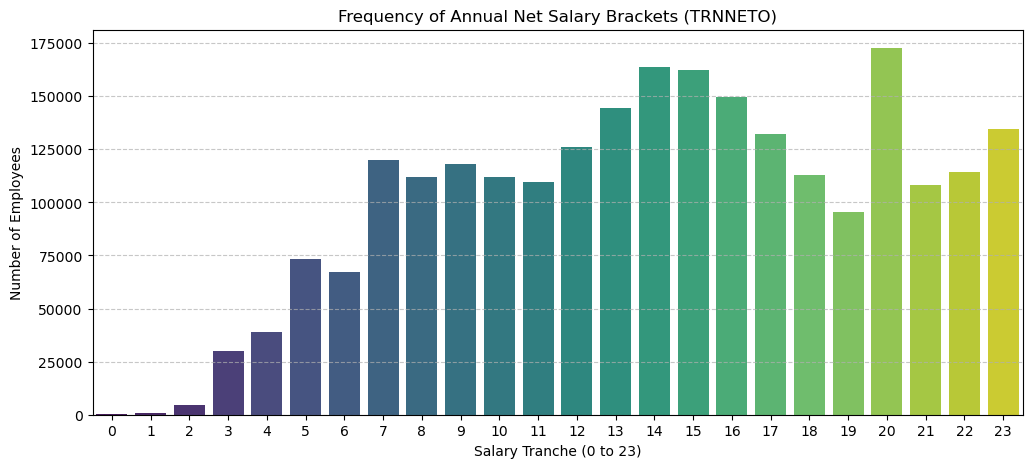

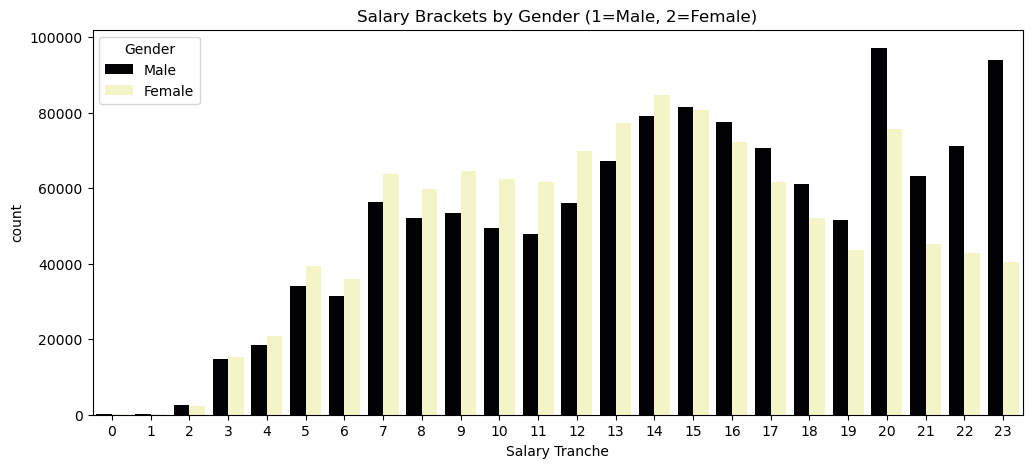

In [12]:
# Descriptive statistics for numerical variables
# Look closely at the min/max for TRNNETO (Salary) 
print("\nStatistical Summary:")
display(df[['TRNNETO']].describe())


# Discrete Distribution (Count Plot)
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='TRNNETO', palette='viridis')

plt.title('Frequency of Annual Net Salary Brackets (TRNNETO)')
plt.xlabel('Salary Tranche (0 to 23)')
plt.ylabel('Number of Employees')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gender-Specific Distribution
# Seeing if men/women cluster in different tranches
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='TRNNETO', hue='SEXE', palette='magma')

plt.title('Salary Brackets by Gender (1=Male, 2=Female)')
plt.xlabel('Salary Tranche')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

In [13]:
# See the breakdown of Gender (SEXE)
# 1 = Male, 2 = Female according to INSEE 
print("\nGender Breakdown:")
print(df['SEXE'].value_counts(normalize=True))


Gender Breakdown:
SEXE
1    0.512067
2    0.487933
Name: proportion, dtype: float64


In [14]:
# See the breakdown of by contract type (CONT_TRAV)
print("Actual values in CONT_TRAV:")
print(df['CONT_TRAV'].value_counts())

print("\nActual values in SEXE:")
print(df['SEXE'].value_counts())

Actual values in CONT_TRAV:
CONT_TRAV
CDI    1399348
AUT     450321
CDD     240886
TTP     101608
APP      78242
TOA      44188
Name: count, dtype: int64

Actual values in SEXE:
SEXE
1    1230895
2    1172880
Name: count, dtype: int64


In [15]:
# Test: Proportion of women in CDI vs CDD
comparison = df[df['CONT_TRAV'].isin(['CDI', 'CDD'])].copy()
comparison['is_female'] = (comparison['SEXE'] == 2).astype(int)

print("Gender Distribution by Contract Type:")
print(comparison.groupby('CONT_TRAV')['is_female'].mean())

Gender Distribution by Contract Type:
CONT_TRAV
CDD    0.591815
CDI    0.455097
Name: is_female, dtype: float64


In [16]:
# Define the Midpoint Mapping (Euro values)
# For Tranches 0-22, we use the midpoint of the range.
# For Tranche 23 (>50,000€), we apply the 1.4x Pareto multiplier.
# Reference: Armour, Burkhauser, and Larrimore (2016)
lower_bound_top = 50000
pareto_multiplier = 1.4

tranche_to_euro = {
    0: 100, 1: 350, 2: 750, 3: 1250, 4: 1750, 5: 2500, 
    6: 3500, 7: 5000, 8: 7000, 9: 9000, 10: 11000, 
    11: 13000, 12: 15000, 13: 17000, 14: 19000, 15: 21000,
    16: 23000, 17: 25000, 18: 27000, 19: 29000, 20: 32500,
    21: 37500, 22: 45000, 
    23: lower_bound_top * pareto_multiplier  # Result: 70,000€
}

# Cleaning Categorical strings
df['CONT_TRAV'] = df['CONT_TRAV'].astype(str).str.strip().str.upper()

# Apply Filtering 
# Following Bach et al. (2021) for prime-age, full-time workers:
# Age 25-65 and 1607h hours follow the paper's 'strong attachment'
# We use tranche 12 (approx. 15,000€) as the minimum wage cutoff.
# We also ensure we only include those with CDI or CDD contracts.
df_model = df[
    (df['NBHEUR'].fillna(0) >= 1607) & 
    (df['AGE'].fillna(0) >= 25) & 
    (df['AGE'].fillna(0) <= 65) &
    (df['TRNNETO'].fillna(0) >= 12) & 
    (df['CONT_TRAV'].isin(['CDI', 'CDD']))
].copy()

# Feature Engineering: Continuous Wage and Log Wage
df_model['annual_wage_euro'] = df_model['TRNNETO'].map(tranche_to_euro)

# y is the Log-Salary (Standard dependent variable for wage gap regressions)
df_model['y'] = np.log(df_model['annual_wage_euro'])

# Treatment Variable: Female = 1, Male = 0
df_model['female'] = (df_model['SEXE'] == 2).astype(int)


print(f"Final sample size for analysis: {len(df_model)}")
print(f"Mean Log Wage (y): {df_model['y'].mean():.4f}")

Final sample size for analysis: 808288
Mean Log Wage (y): 10.2683


In [17]:
# Calculate the percentage within the filtered model dataframe
top_earner_pct_filtered = (df_model['TRNNETO'] == 23).mean() * 100

print(f"Final analytical sample size: {len(df_model)}")
print(f"Proportion of top earners (>50k) in filtered sample: {top_earner_pct_filtered:.2f}%")

# EXTRA: Check the gender breakdown of this 5.6% group
# This is crucial for your 'Glass Ceiling' argument
top_earners = df_model[df_model['TRNNETO'] == 23]
gender_split_top = top_earners['female'].value_counts(normalize=True) * 100

print("\nGender distribution within the top bracket (>50k):")
print(f"Men: {gender_split_top.get(0, 0):.2f}%")
print(f"Women: {gender_split_top.get(1, 0):.2f}%")

Final analytical sample size: 808288
Proportion of top earners (>50k) in filtered sample: 10.59%

Gender distribution within the top bracket (>50k):
Men: 71.78%
Women: 28.22%


In [18]:
# Total observations currently in df_model (CDI + CDD)
current_total = len(df_model)

# Observations if we filtered only for CDI
cdi_only_count = len(df_model[df_model['CONT_TRAV'] == 'CDI'])

# Calculations
lost_obs = current_total - cdi_only_count
percentage_lost = (lost_obs / current_total) * 100

print(f"Current Sample Size (CDI + CDD): {current_total:,}")
print(f"Sample Size if restricted to CDI: {cdi_only_count:,}")
print(f"Observations lost: {lost_obs:,}")
print(f"Percentage of current sample lost: {percentage_lost:.2f}%")

Current Sample Size (CDI + CDD): 808,288
Sample Size if restricted to CDI: 773,603
Observations lost: 34,685
Percentage of current sample lost: 4.29%


In [19]:
print(f"Number of women in sample: {df_model['female'].sum()}")

Number of women in sample: 323770


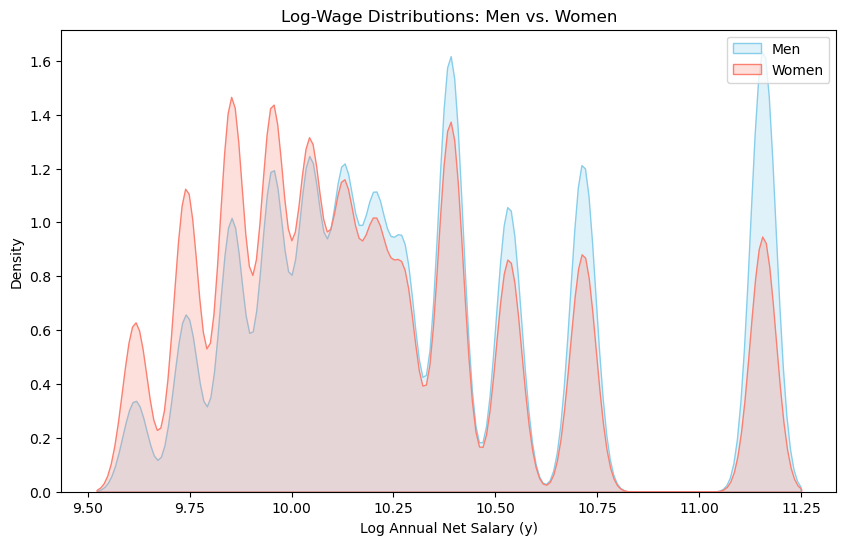

In [20]:
# The Kernel Density Estimate (KDE)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_model[df_model['female'] == 0], x='y', label='Men', fill=True, color='skyblue')
sns.kdeplot(data=df_model[df_model['female'] == 1], x='y', label='Women', fill=True, color='salmon')

plt.title('Log-Wage Distributions: Men vs. Women')
plt.xlabel('Log Annual Net Salary (y)')
plt.ylabel('Density')
plt.legend()
plt.show()


The Kernel Density Estimate compares the overall "shape" of earnings between men and women.
- Peak Displacement: The "Women" peaks are consistently higher on the left side (lower log-wages, roughly $9.50$ to $10.00$) than the "Men" peaks, indicating women are more concentrated in lower-paying brackets.
- Right-Tail Disparity: There is a dramatic divergence at the highest log-wage levels (above $10.75$). The male distribution features a substantial "mass" in the highest tier that is significantly larger than the corresponding female mass.

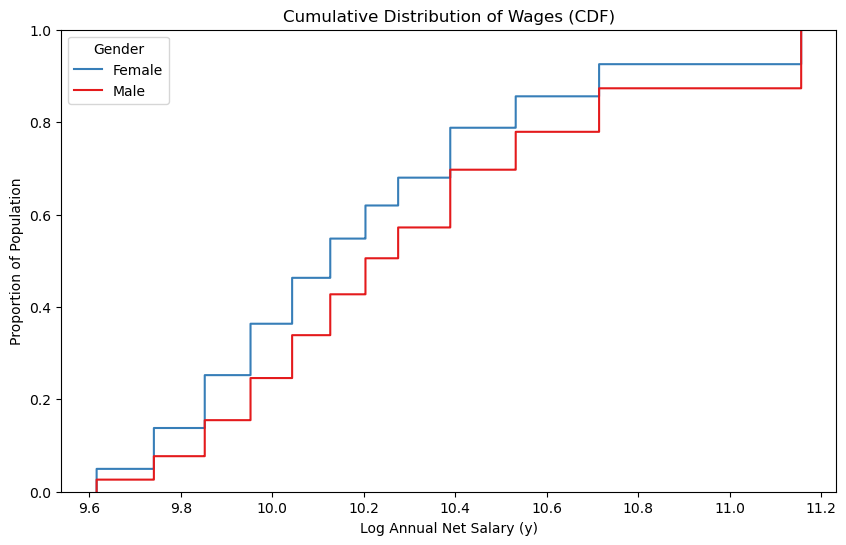

In [21]:
# Cumulative Distribution Function (CDF)

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_model, x='y', hue='female', palette='Set1')

plt.title('Cumulative Distribution of Wages (CDF)')
plt.xlabel('Log Annual Net Salary (y)')
plt.ylabel('Proportion of Population')
plt.legend(title='Gender', labels=['Female', 'Male']) # Check your encoding (0/1)
plt.show()

The CDF illustrates the probability of earning at most a certain wage.

- Female Dominance at Lower Thresholds: The blue "Female" line stays consistently above and to the left of the red "Male" line across the entire distribution.

- Interpretation: This confirms that at any given salary level, a higher proportion of women earn less than that threshold compared to men. For example, at a log-wage of $10.2$, nearly $60\%$ of women earn less than this amount, while only about $45\%$ of men fall below it.

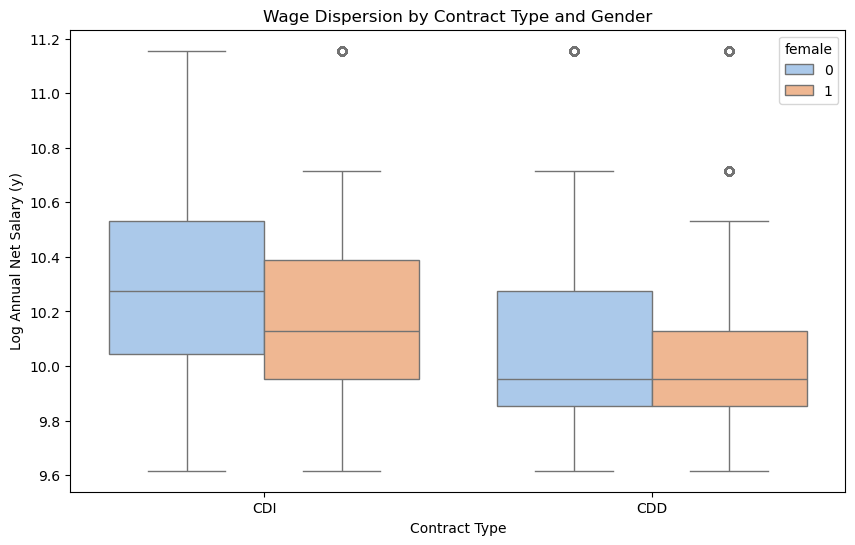

In [22]:
# Boxplot by Contract Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_model, x='CONT_TRAV', y='y', hue='female', palette='pastel')

plt.title('Wage Dispersion by Contract Type and Gender')
plt.xlabel('Contract Type')
plt.ylabel('Log Annual Net Salary (y)')
plt.show()

This plot breaks down the gap by employment stability (CDI vs. CDD).

- The "Stable" Gap (CDI): Even within permanent contracts, the male median (the middle line in the blue box) is notably higher than the female median.
- The "Precarious" Gap (CDD): While overall wages are lower in CDD contracts, the gender gap persists. Interestingly, the female median in CDDs is lower than almost any other group, highlighting a "double penalty" of precarious work and gender.
- Outliers: Men have significantly more "high-wage" outliers in both contract types, reaching log-wages near $11.2$, whereas female outliers are far fewer and lower.

In [23]:
# Create a mask for high earners (Tranche 23)
top_earners = df_model[df_model['TRNNETO'] == 23]

# Compare the most common jobs (PCS) for men vs women in the elite bracket
print("Top 5 Occupations for Men (>50k€):")
print(top_earners[top_earners['female'] == 0]['PCS'].value_counts().head(5))

print("\nTop 5 Occupations for Women (>50k€):")
print(top_earners[top_earners['female'] == 1]['PCS'].value_counts().head(5))

Top 5 Occupations for Men (>50k€):
PCS
374D    4221
388A    4035
388C    2641
372B    2002
373B    1925
Name: count, dtype: int64

Top 5 Occupations for Women (>50k€):
PCS
372B    1245
372C    1210
374D    1150
373D    1085
373B    1084
Name: count, dtype: int64


In [24]:
# Group and calculate stats
summary = df_model.groupby('female')['annual_wage_euro'].agg(['mean', 'median'])
summary.index = ['Male', 'Female']

# Extract values as individual variables to perform the math
male_mean = summary.loc['Male', 'mean']
female_mean = summary.loc['Female', 'mean']

# Calculate the gaps
raw_gap = male_mean - female_mean
gap_percent = (raw_gap / male_mean) * 100

# Display results clearly
print(summary)
print("-" * 30)
print(f"Raw Wage Gap: {raw_gap:.2f} €")
print(f"Gender Pay Gap: {gap_percent:.2f}%")

                mean   median
Male    33288.504245  27000.0
Female  29259.519103  25000.0
------------------------------
Raw Wage Gap: 4028.99 €
Gender Pay Gap: 12.10%


In [25]:
# Calculate gap within the top 5 most frequent occupations
top_occupations = df_model['PCS'].value_counts().head(5).index
sorting_check = df_model[df_model['PCS'].isin(top_occupations)].groupby(['PCS', 'female'])['annual_wage_euro'].mean().unstack()
sorting_check['gap_pct'] = (1 - (sorting_check[1] / sorting_check[0])) * 100
print(sorting_check)

female             0             1    gap_pct
PCS                                          
388A    45828.926142  41665.225307   9.085312
542A    25853.518822  23348.547323   9.689093
543G    28210.492059  24579.875120  12.869740
551A    20530.048643  19092.324961   7.003021
641A    25154.443092  22668.765743   9.881663


In [26]:
# "Contract Type" Breakdown
contract_gap = df_model.groupby(['CONT_TRAV', 'female'])['annual_wage_euro'].mean().unstack()
contract_gap['gap_pct'] = (1 - (contract_gap[1] / contract_gap[0])) * 100
print(contract_gap)

female                0             1    gap_pct
CONT_TRAV                                       
CDD        26543.317639  23726.508621  10.612121
CDI        33486.326063  29640.942256  11.483445


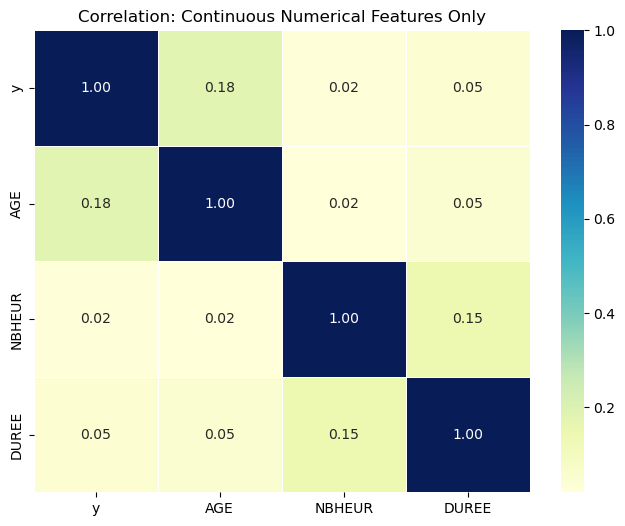

In [27]:
# Correlation Matrix

# Select only the continuous numerical features
# 'y' is log-wage, 'AGE' is experience, 'NBHEUR' is labor supply intensity
purely_numerical = ['y', 'AGE', 'NBHEUR','DUREE']

# Compute the correlation matrix
corr_num = df_model[purely_numerical].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_num, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

plt.title('Correlation: Continuous Numerical Features Only')
plt.show()

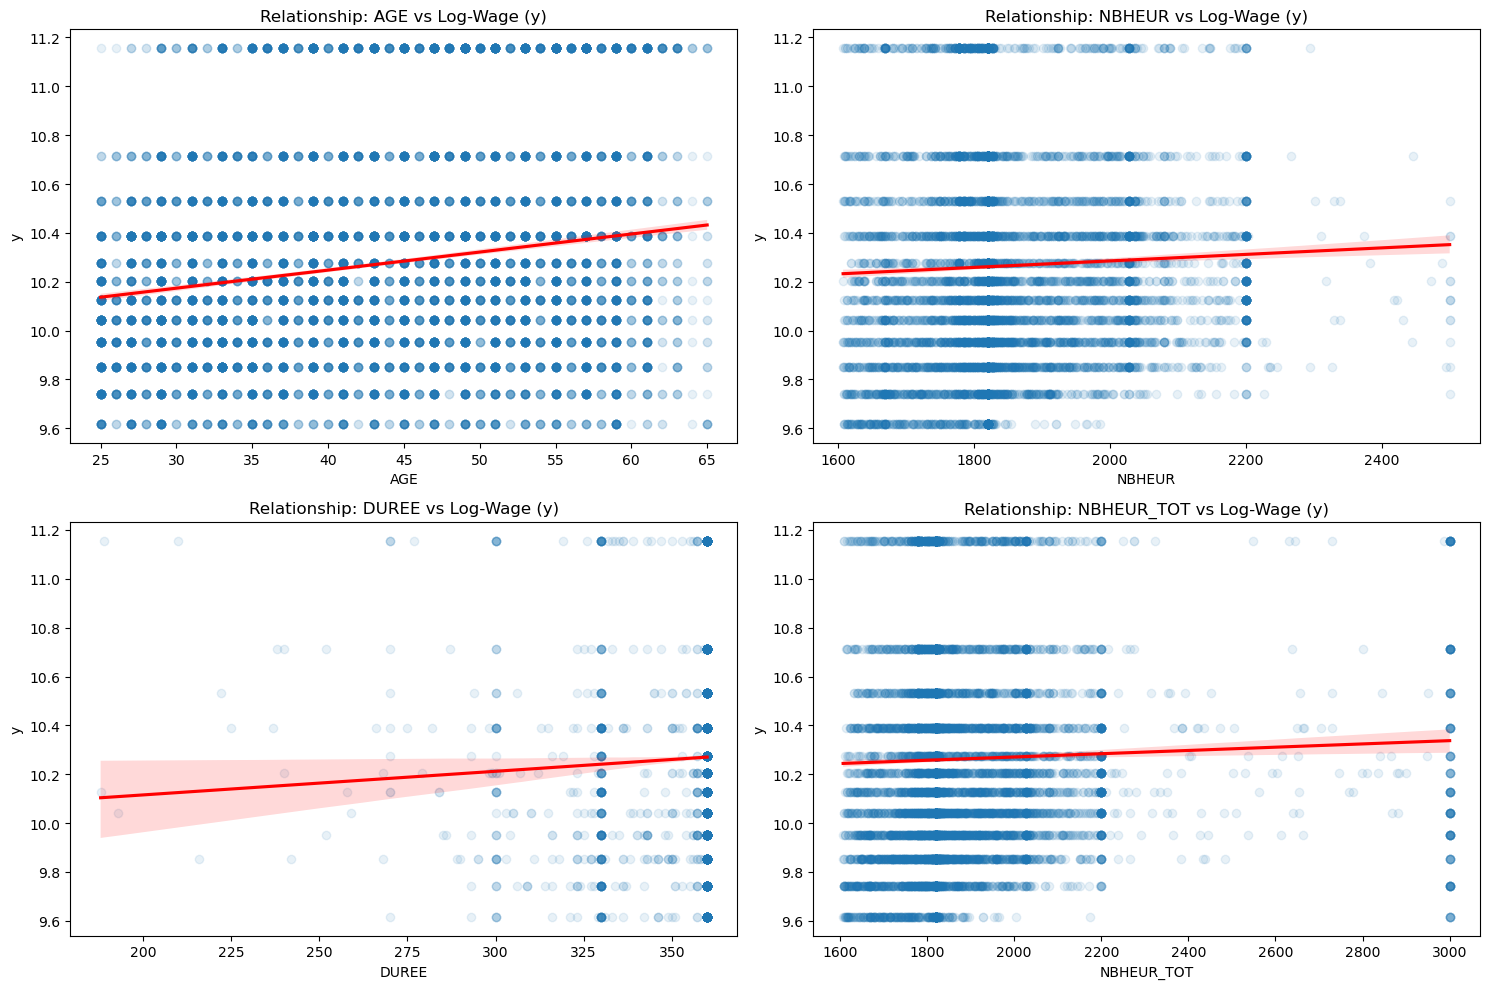

In [28]:
# For Numerical (Continuous) Variables: Pairplots & Regplots


# Define true continuous columns
num_features = ['AGE', 'NBHEUR', 'DUREE', 'NBHEUR_TOT']

# Create a multi-plot figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    # regplot shows the distribution and the linear trend with wage 'y'
    sns.regplot(data=df_model.sample(10000), x=col, y='y', ax=axes[i], 
                scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
    axes[i].set_title(f'Relationship: {col} vs Log-Wage (y)')

plt.tight_layout()
plt.show()

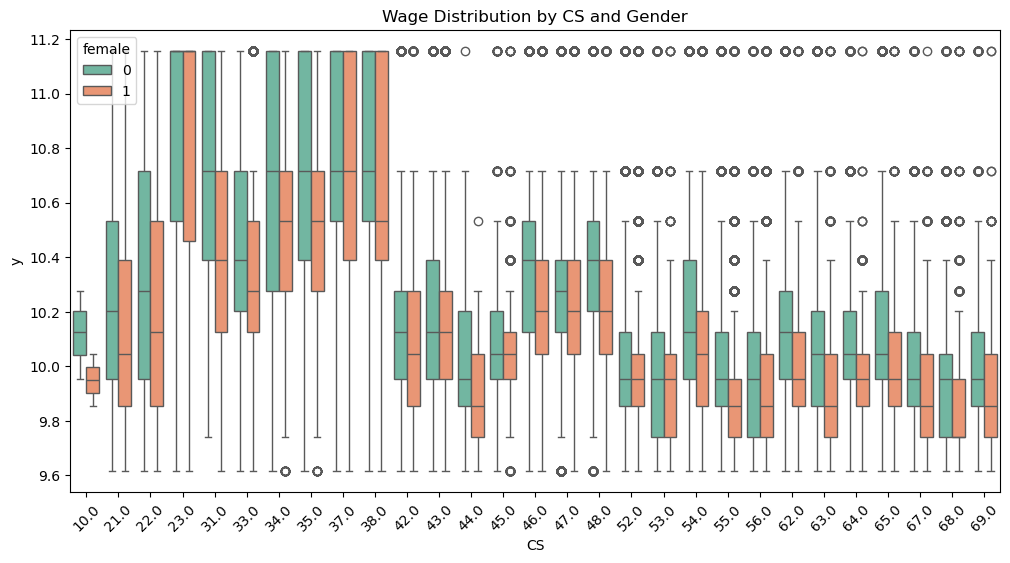

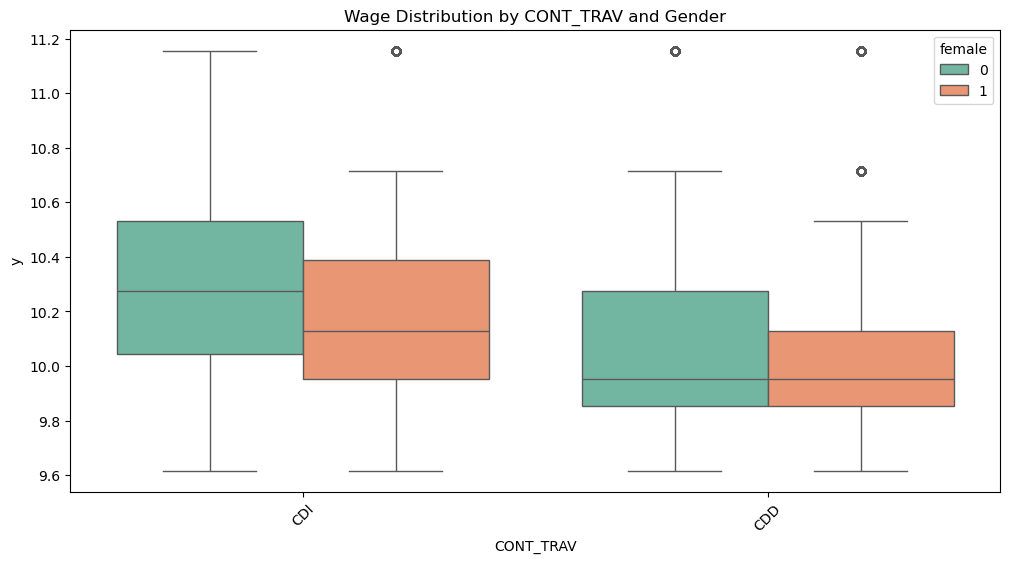

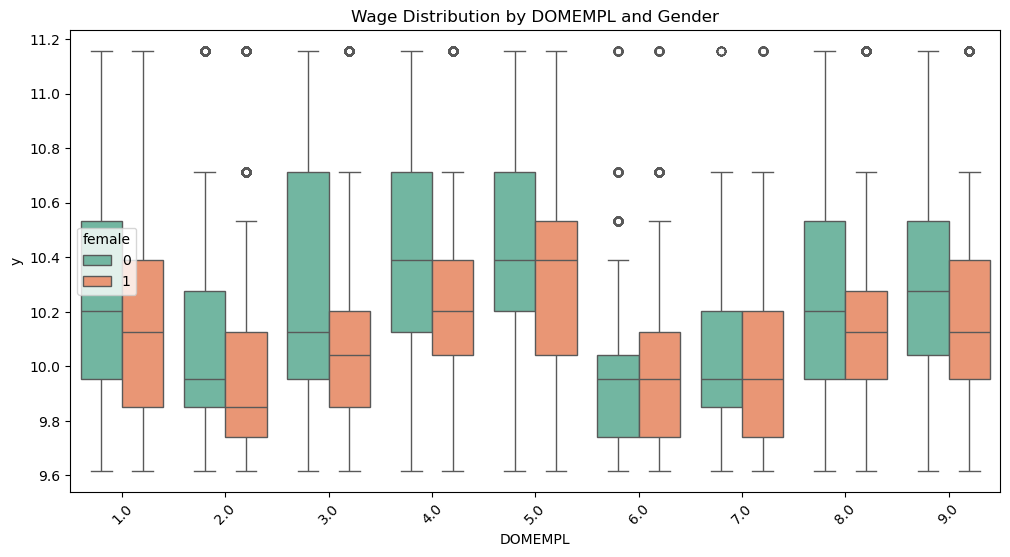

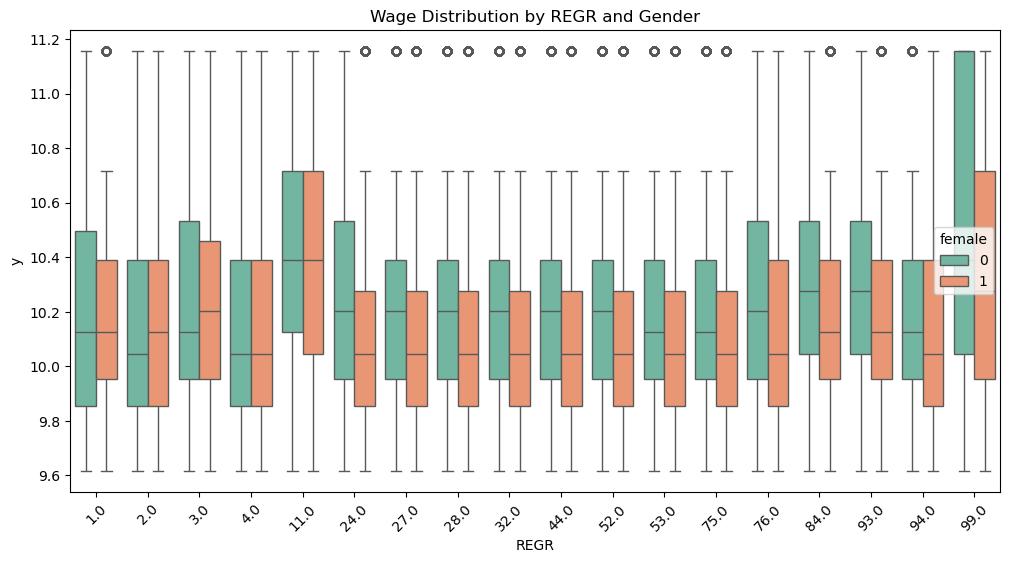

In [29]:
# For Categorical Variables: Boxplots & Mean Plots

# List of categorical features (including coded ones like CS and REGR)
cat_features = ['CS', 'CONT_TRAV', 'DOMEMPL', 'REGR']

for col in cat_features:
    plt.figure(figsize=(12, 6))
    # Boxplot shows the median and spread of wages for every category
    sns.boxplot(data=df_model, x=col, y='y', hue='female', palette='Set2')
    plt.title(f'Wage Distribution by {col} and Gender')
    plt.xticks(rotation=45)
    plt.show()

In [30]:
import statsmodels.formula.api as smf

# Define the quantiles (from 0.1 to 0.9)
quantiles = np.arange(0.1, 1.0, 0.1)

# Fit the Quantile Regression models
# We include age and hours as baseline controls
qr_results = []
for q in quantiles:
    # Formula: y (log-wage) explained by female, age, and hours
    model = smf.quantreg('y ~ female + AGE + NBHEUR', df_model).fit(q=q)
    qr_results.append({
        'quantile': q,
        'coef': model.params['female'],
        'lb': model.conf_int().loc['female', 0], # Lower Bound
        'ub': model.conf_int().loc['female', 1]  # Upper Bound
    })

df_qr = pd.DataFrame(qr_results)

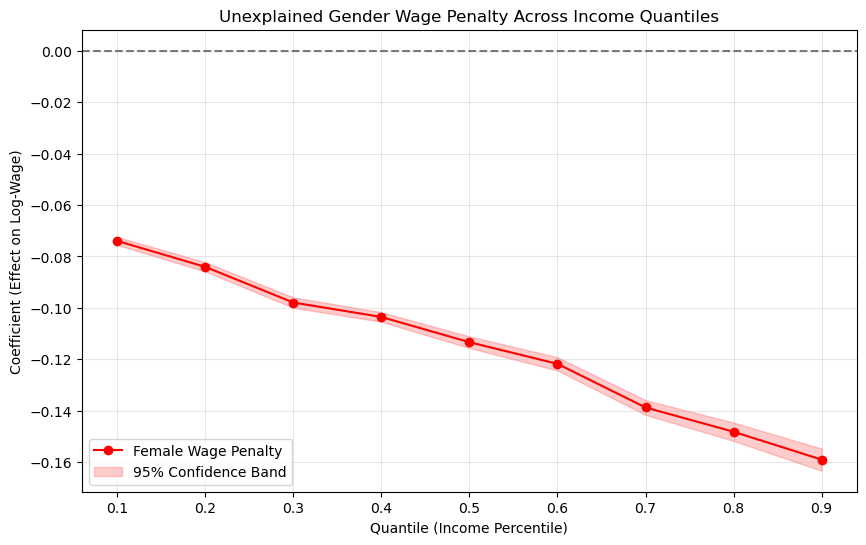

In [31]:
plt.figure(figsize=(10, 6))

# Plot the coefficient line
plt.plot(df_qr['quantile'], df_qr['coef'], color='red', label='Female Wage Penalty', marker='o')

# Add the confidence bands (Shaded area)
plt.fill_between(df_qr['quantile'], df_qr['lb'], df_qr['ub'], color='red', alpha=0.2, label='95% Confidence Band')

# Reference line at zero
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.title('Unexplained Gender Wage Penalty Across Income Quantiles')
plt.xlabel('Quantile (Income Percentile)')
plt.ylabel('Coefficient (Effect on Log-Wage)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The downward trajectory of the unexplained wage penalty across the income distribution reveals:

- The "Sticky Floor" (Quantile 0.1 - 0.3): At the lower end of the distribution, the penalty starts at roughly -0.075 (a 7.5% gap). This indicates that women encounter a significant baseline disadvantage immediately upon entry into the labor market, even in lower-paying roles.
- The "Glass Ceiling" (Quantile 0.7 - 0.9): The most striking result is the sharp intensification of the penalty among high earners, where the gap widens to nearly -0.16 (16%) at the 90th percentile. This confirms a classic Glass Ceiling effect, where the "unexplained" barriers to equal pay become progressively more severe as women ascend the professional hierarchy.

Causal Graph for Gender Wage Gap Identification:


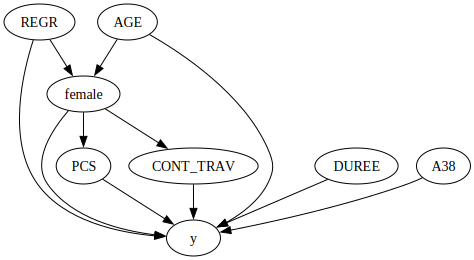

In [32]:
import collections
import collections.abc

# Fix for Python 3.10+ compatibility
collections.Iterable = collections.abc.Iterable

from causalgraphicalmodels import CausalGraphicalModel
import matplotlib.pyplot as plt

# 1. Define the structure
dag = CausalGraphicalModel(
    nodes=["female", "y", "AGE", "DUREE", "PCS", "CONT_TRAV", "A38", "REGR"],
    edges=[
        # Treatment -> Outcome
        ("female", "y"),           
        
        # Mediated paths (Occupational Sorting)
        ("female", "PCS"),         
        ("female", "CONT_TRAV"),   
        ("PCS", "y"),              
        ("CONT_TRAV", "y"),        
        ("A38", "y"),              
        
        # Confounding paths
        ("AGE", "female"),         
        ("AGE", "y"),              
        ("REGR", "y"),             
        ("REGR", "female"),        
        ("DUREE", "y")             
    ]
)

# 2. Draw the graph
print("Causal Graph for Gender Wage Gap Identification:")
dag.draw()

 Identification Strategy: Causal Graph (DAG)
 
 To isolate the causal effect of gender on wages, we define the following Directed Acyclic Graph (DAG) to map our structural assumptions:
 
 The Causal Model:
 - Treatment (D): female. We aim to estimate the "unexplained" penalty associated with this variable.
 - Outcome (Y): y (Log-Wage). The target variable representing annual earnings.
 - Confounders (X): AGE and REGR (Region). These variables represent "backdoor paths" because they influence both the treatment assignment (cohort and geographic labor trends) and the outcome (experience and cost-of-living premiums).
 - Mediators (M): PCS (Occupation), CONT_TRAV (Contract Type), and A38 (Sector). These represent the "explained" portion of the wage gap, where gender influences the sorting of workers into different roles and industries.
 
 
 Identification Assumptions
 - Direct Effect: The direct edge from female $\rightarrow$ y represents the ceteris paribus effect. By controlling for the variables in our DAG, we isolate the residual gender wage gap—the portion of the penalty that remains when comparing individuals with identical observable characteristics.
 - Blocking Backdoor Paths: To ensure the internal validity of our causal estimate, we must satisfy the unconfoundedness assumption. By controlling for confounders like AGE and REGR, we "block" non-causal associations, ensuring that factors like regional labor market disparities or age-based experience premiums do not bias the gender coefficient.
 - Controlling for Mediators (Occupational Sorting): We include high-dimensional controls for PCS (429 categories) and A38 (38 sectors) to account for horizontal and vertical segregation. This approach effectively transforms our estimate into a within-job comparison, isolating the "unexplained" penalty that exists even for women working in the same specific roles as men.
 
Variable Selection for PostLasso:
Based on our causal structure, we define the following feature sets for the Post-Lasso estimation:
- Target (Y): y (Log-wage).
- Treatment (D): female (Binary indicator).
- High-Dimensional Controls (X):
    - Continuous: AGE, DUREE, NBHEUR.
    - Categorical (One-Hot Encoded): PCS (Job classification), A38 (Industry sector), REGR (Region), CONT_TRAV (Contract type).


 

In [33]:
import os

# Use '../' to step out of the notebooks folder first
output_dir = "../data/processed" 
output_filename = "sample_dataset.csv"
full_path = os.path.join(output_dir, output_filename)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Export the processed DataFrame
df_model.to_csv(full_path, index=False)

# Verification
if os.path.exists(full_path):
    file_size = os.path.getsize(full_path) / (1024 * 1024)
    print(f"✅ Success! File saved at: {full_path}")
    print(f"📊 Total Rows: {len(df_model):,}")
    print(f"💾 File Size: {file_size:.2e} MB")
else:
    print("❌ Error: File was not saved.")

✅ Success! File saved at: ../data/processed/sample_dataset.csv
📊 Total Rows: 808,288
💾 File Size: 1.19e+02 MB
